<a href="https://colab.research.google.com/github/pdanahy/ML-public/blob/main/Pix2Depth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MOUNT DRIVE

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


CLONE REPO + INSTALL DEPENDENCIES

In [6]:
pip install timm

     |████████████████████████████████| 376 kB 8.4 MB/s 


In [32]:
import cv2
from IPython.display import Image, display
import torch
import urllib.request

import matplotlib.pyplot as plt

#filename ='/content/' + 'ImageSampling.jpg'
filename = '/content/ImageSampl_quadNodes_Storage_recomposed.jpg'
#url, filename = ("https://github.com/pytorch/hub/raw/master/images/dog.jpg", "dog.jpg")
#urllib.request.urlretrieve(url, filename)

In [27]:
model_type = "DPT_Large"     # MiDaS v3 - Large     (highest accuracy, slowest inference speed)
#model_type = "DPT_Hybrid"   # MiDaS v3 - Hybrid    (medium accuracy, medium inference speed)
#model_type = "MiDaS_small"  # MiDaS v2.1 - Small   (lowest accuracy, highest inference speed)

midas = torch.hub.load("intel-isl/MiDaS", model_type)

Using cache found in /root/.cache/torch/hub/intel-isl_MiDaS_master


In [33]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
midas.to(device)
midas.eval()

midas_transforms = torch.hub.load("intel-isl/MiDaS", "transforms")

if model_type == "DPT_Large" or model_type == "DPT_Hybrid":
    transform = midas_transforms.dpt_transform
else:
    transform = midas_transforms.small_transform

Using cache found in /root/.cache/torch/hub/intel-isl_MiDaS_master


In [34]:
img = cv2.imread(filename)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

input_batch = transform(img).to(device)

In [35]:
with torch.no_grad():
    prediction = midas(input_batch)

    prediction = torch.nn.functional.interpolate(
        prediction.unsqueeze(1),
        size=img.shape[:2],
        mode="bicubic",
        align_corners=False,
    ).squeeze()

output = prediction.cpu().numpy()

import os
plt.imsave('/content/' + 'depth' + os.path.basename(os.path.normpath(filename)), output)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3635: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)


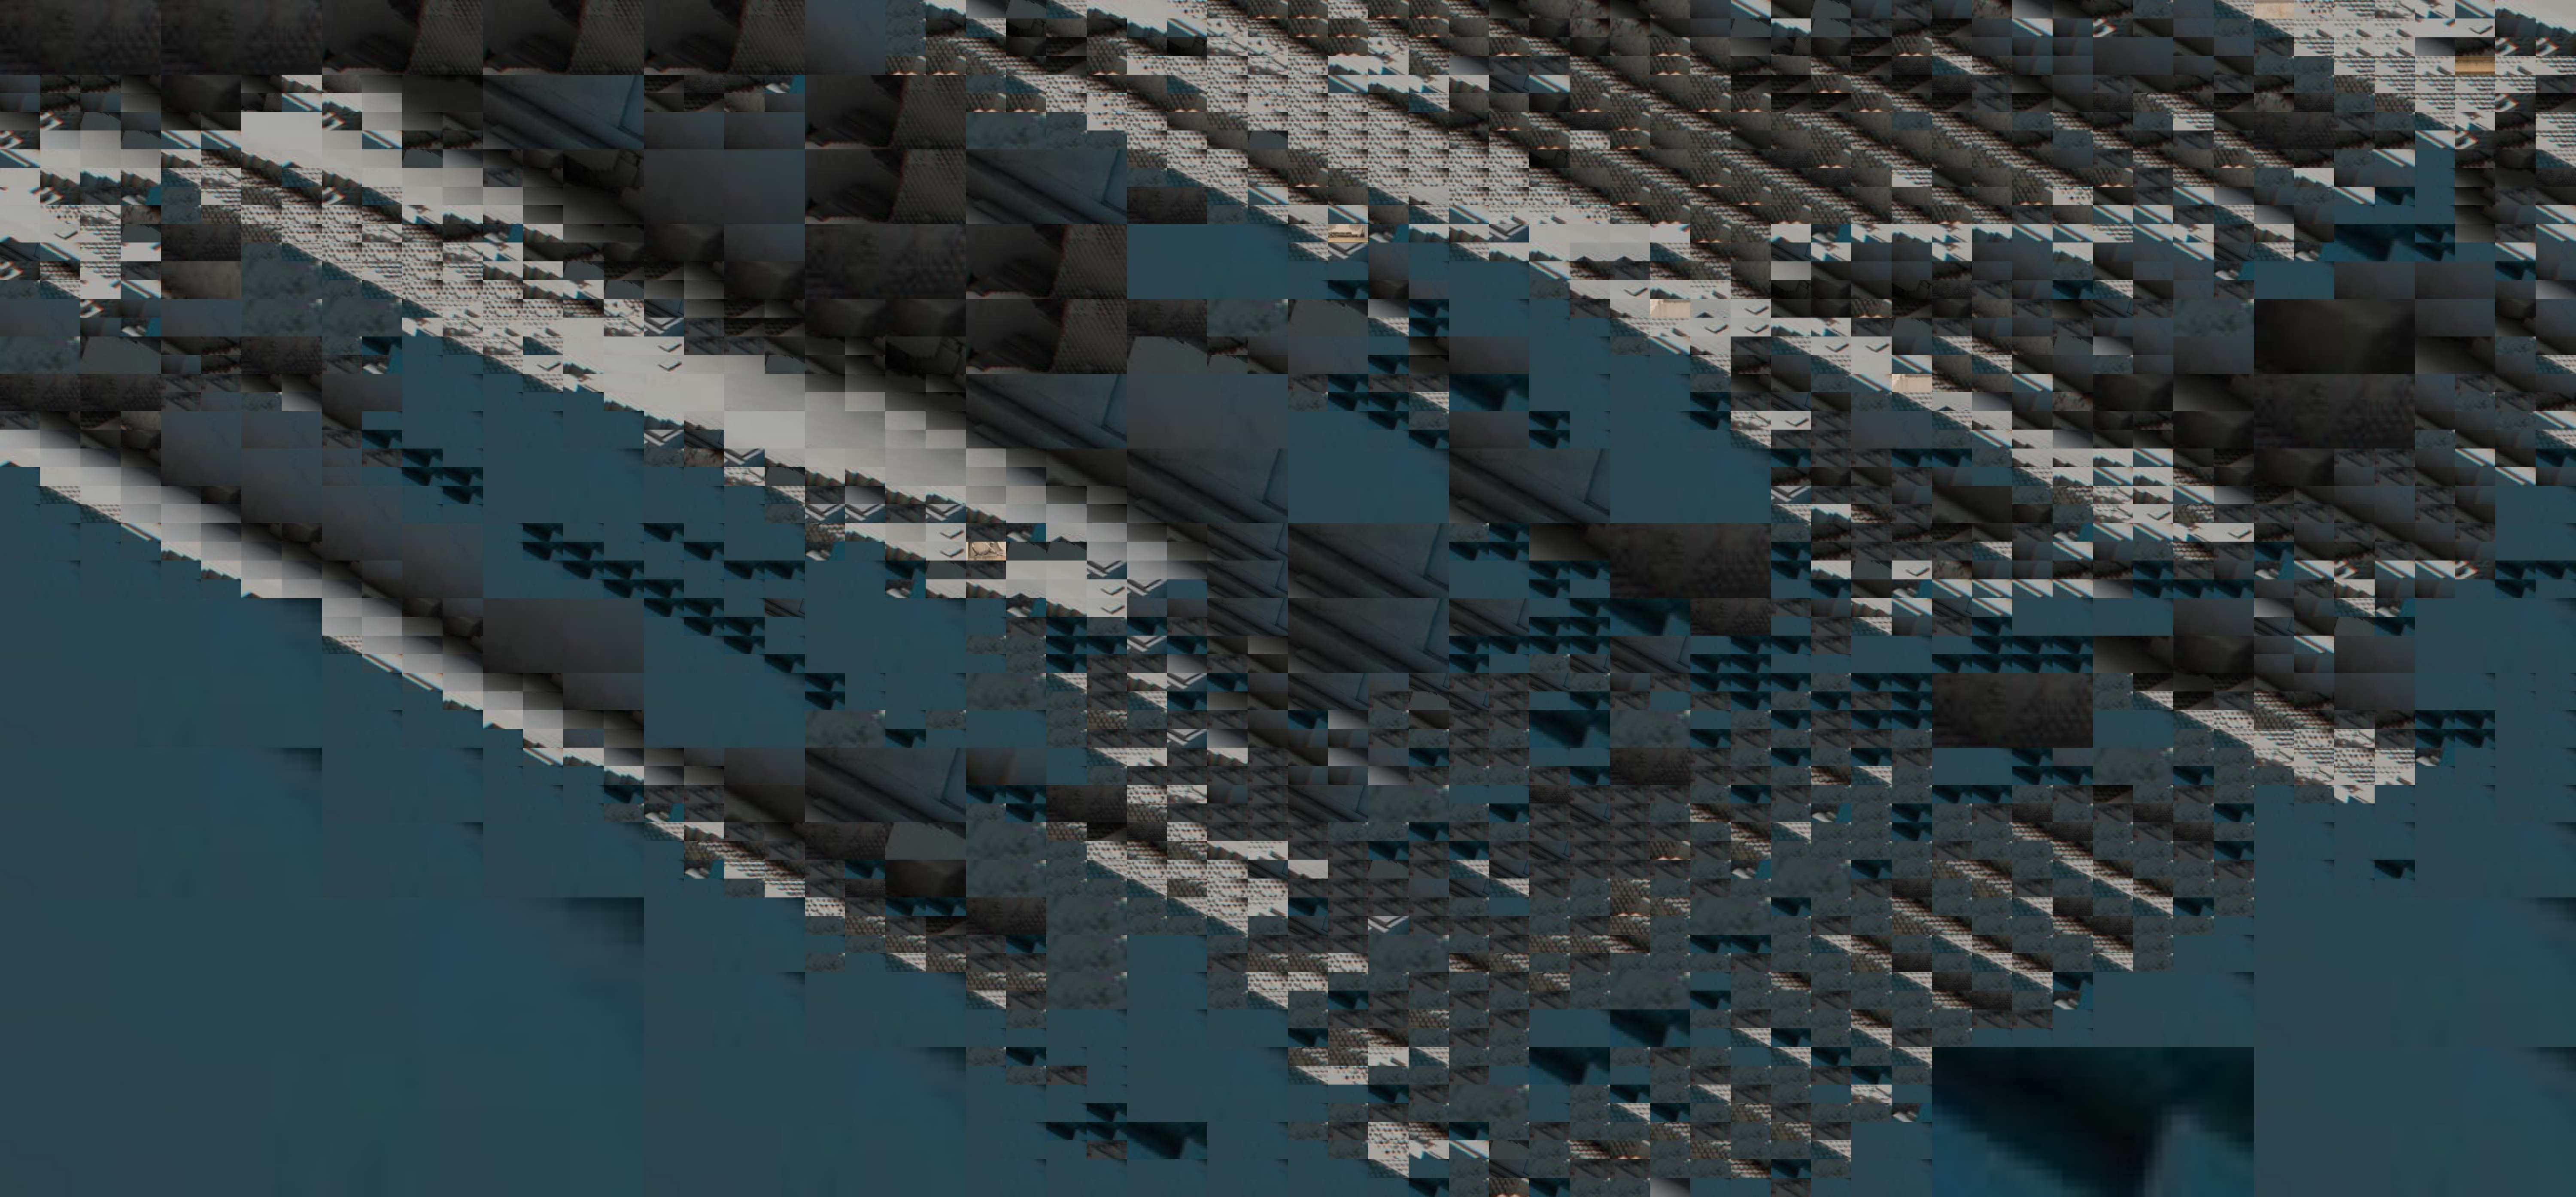

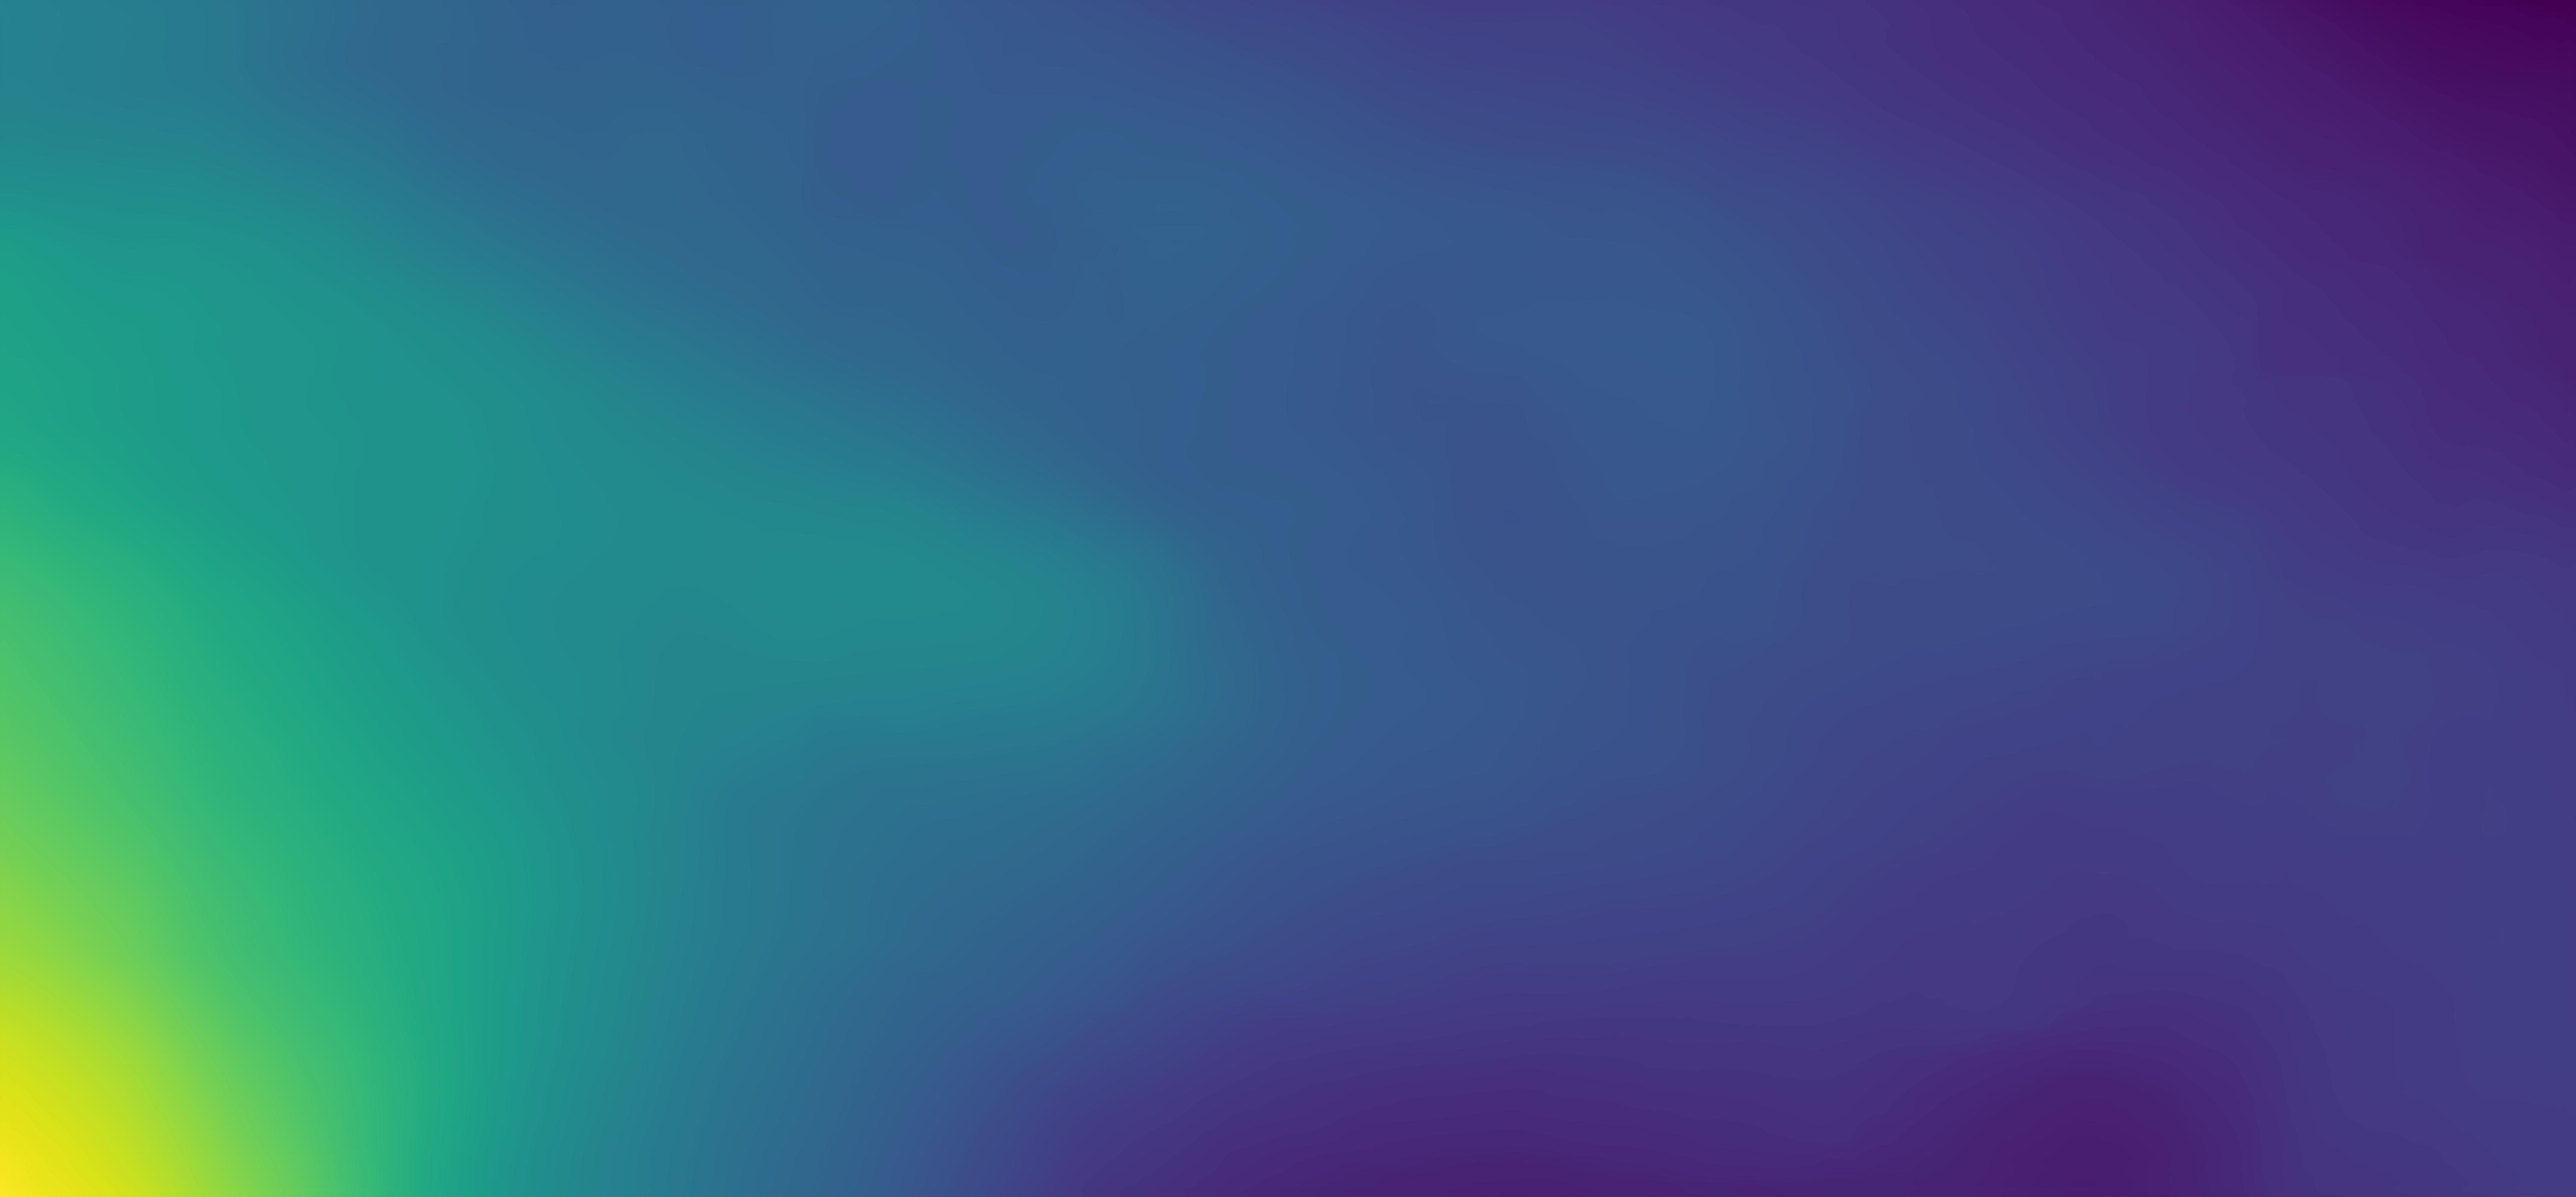

In [36]:
display(Image(filename))
display(Image('/content/depth' + os.path.basename(os.path.normpath(filename))))